In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator

# Exercise 1: Clustering Method

In this exercise we will explore how each clustering algorithm discussed in the class works.

## Load Dataset

The dataset that we will use is a **customer transaction in a certain mall**. In this dataset there will 4 features including Gender, Age, Annual Income, and Spending Score. You can get the dataset from **Elearn**

In [67]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/tsalisacamila/Data-Mining/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [68]:
# rename the Annual Income (k$)	Spending Score (1-100) column

df = df.rename(columns={"Annual Income (k$)": "AnnualIncome"})
df = df.rename(columns={"Spending Score (1-100)": "SpendingScore"})
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [69]:
# describe data
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [70]:
# Check for null values in the dataset
df.isnull().sum()

CustomerID       0
Gender           0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64

In [72]:
df = df[['AnnualIncome', 'SpendingScore']]
df.head()

,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27788\2332594070.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['SpendingScore'], shade=True, color='purple')


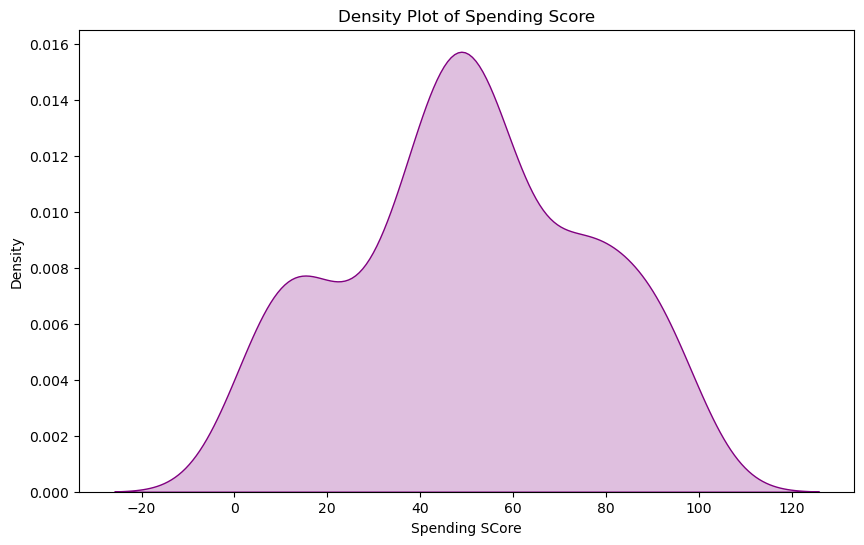

In [73]:
# make an insightful visualization and explain
plt.figure(figsize=(10, 6))
sns.kdeplot(df['SpendingScore'], shade=True, color='purple')
plt.title("Density Plot of Spending Score")
plt.xlabel("Spending SCore")
plt.ylabel("Density")
plt.show()


A density plot is a smoothed version of the histogram. It's useful for visualizing the probability density function of a continuous variable. The shade=True argument fills the area under the curve.

In [74]:
print(df.columns)


Index(['AnnualIncome', 'SpendingScore'], dtype='object')


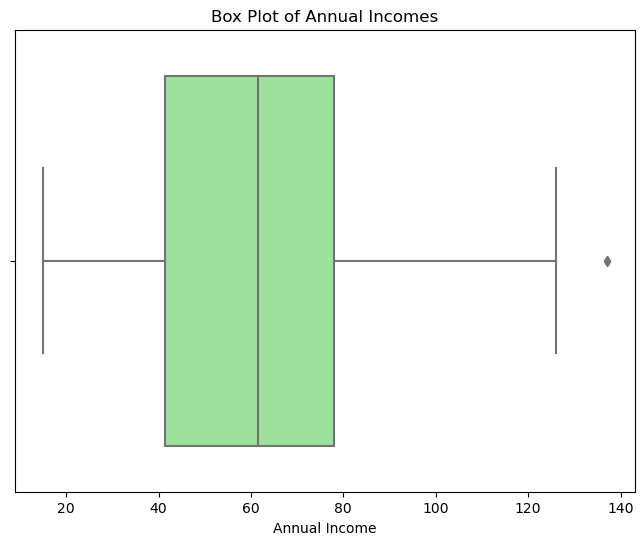

In [75]:
# make an insightful visualization and explain
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['AnnualIncome'], color='lightgreen')
plt.title("Box Plot of Annual Incomes")
plt.xlabel("Annual Income")
plt.show()

A box plot provides a summary of the distribution of the data, including the median (middle line), interquartile range (box), and outliers (points outside the "whiskers"). This is helpful for detecting skewness and spotting potential outliers.

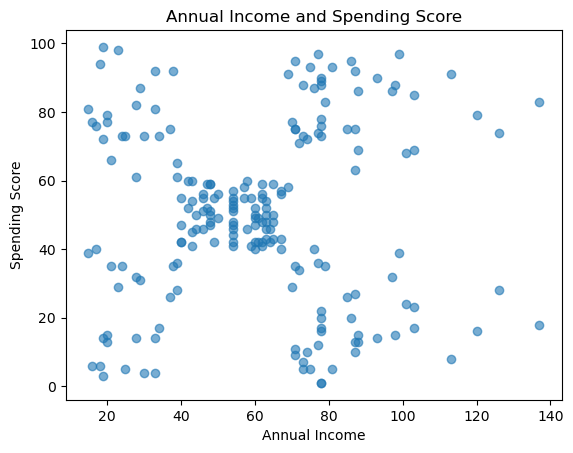

In [76]:
import matplotlib.pyplot as plt

plt.scatter(df["AnnualIncome"], df["SpendingScore"], alpha=0.6)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Annual Income and Spending Score")
plt.show()

## Data Preprocessing

For this case study, we only use income and spending score

In [77]:
# create new dataframe that consist only annual income and spending score
df = df[['AnnualIncome', 'SpendingScore']]
df.head()

,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Before we analyze our data, we need to scale the data. You can use MinMaxScaler or StandardScaler.

In [60]:
# scale dataset with standard scaler

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df = pd.DataFrame(sc.fit_transform(df), columns=["income", "spending"])
df.head()

,income,spending
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [62]:
# get stastical information on the new dataset
df.describe()

,income,spending
count,2.000000e+02,2.000000e+02
mean,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00
min,-1.738999e+00,-1.910021e+00
25%,-7.275093e-01,-5.997931e-01
50%,3.587926e-02,-7.764312e-03
75%,6.656748e-01,8.851316e-01
max,2.917671e+00,1.894492e+00


Then, we check the inisial position for our sample. You may use pairplot or scattered chart for the visualization option.

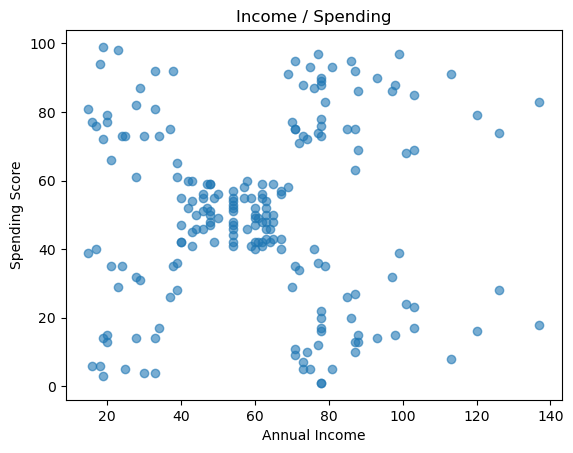

In [79]:
# Visualize the position
plt.scatter(df["AnnualIncome"], df["SpendingScore"], alpha=0.6)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Income / Spending")
plt.show()

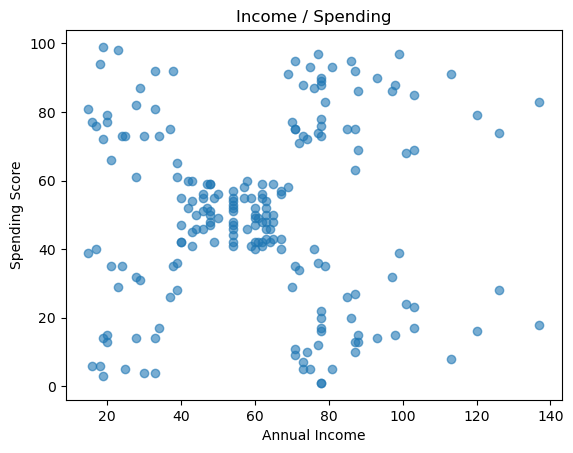

In [80]:
# Visualize the position using the original scale
plt.scatter(df["AnnualIncome"], df["SpendingScore"], alpha=0.6)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Income / Spending")
plt.show()

## Clustering

The evaluation for chosing the number of K in KMEANS can be done by several methods such as elbow method.

1. using elbow method
In this case study, the below parameter settings is used:
- init: random
- range: (1,11)
- max_iter: 300
- random state: 42

In [16]:
# set the parameter for evaluating K
sse=[]

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, random_state=42)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Wi

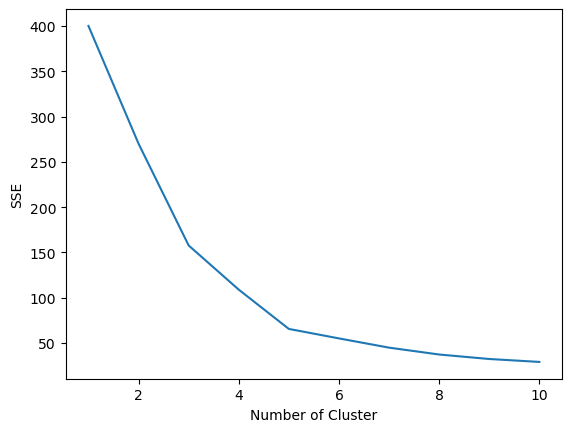

In [17]:
# manually visualize the elbow method using plotlib
plt.plot(range(1, 11), sse)
plt.xlabel('Number of Cluster')
plt.ylabel('SSE')
plt.show()

In [18]:
# using kneelocator to find the elbow/knee
kneedle = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
print("the best k for your model is", kneedle.elbow)


the best k for your model is 5


### K-Means Algorithm

For using KMeans clustering algorithm, you need to define the number of cluster, initialization number, number of iteration, and random state.

In this case study, the below parameter settings is used:
- centroid initialization: random
- number of cluster: 5
- number of iteration: 300
- random state: 42

In [19]:
# assign cluster with K-Means algorithm
kmeans = KMeans(n_clusters=5, init='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(df)
y_pred

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 2,
       0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 1, 4, 2, 4, 1, 4, 1, 4,
       2, 4, 1, 4, 1, 4, 1, 4, 1, 4, 2, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

Visualize your result based on income and spending. You also can show the final position of the centroid.

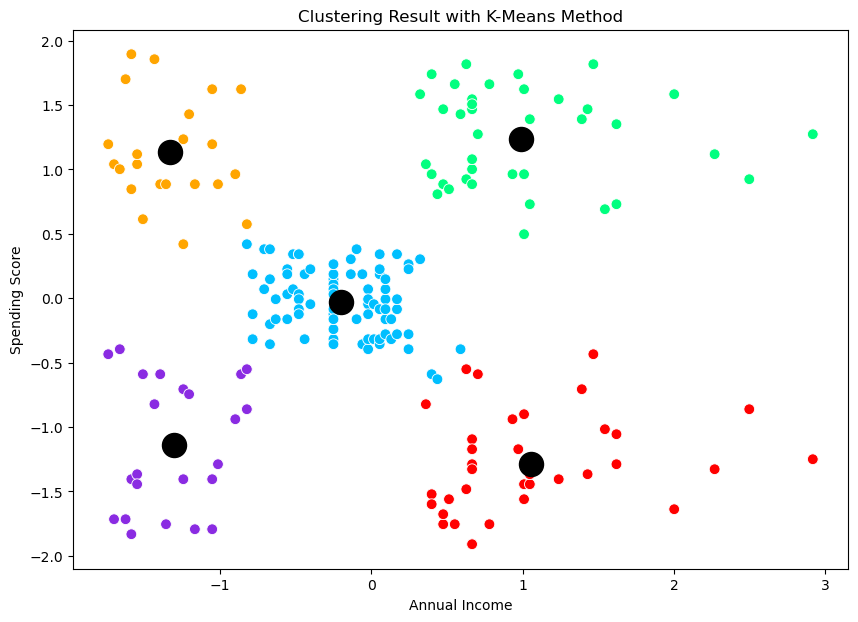

In [20]:
# visualize the result using scater chart
plt.figure(figsize=(10,7))

sns.scatterplot(
    x="income", 
    y="spending", 
    hue=y_pred, 
    palette=["blueviolet", "red", "deepskyblue","orange","springgreen",], 
    legend=None, 
    data=df, 
    s=60
)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c="black")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Clustering Result with K-Means Method")
plt.show()

In [82]:
# Inverse transform the scaled data to get the original values
df = pd.DataFrame(sc.inverse_transform(df), columns = ["AnnualIncome", "SpendingScore"])
df['Cluster'] = y_pred
df.head()

,AnnualIncome,SpendingScore,Cluster
0,453.544656,1054.796397,0
1,453.544656,2136.669439,3
2,479.743633,204.753292,0
3,479.743633,2033.633911,3
4,505.942610,1080.555279,0


In [35]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df.groupby(y_pred).agg({'SpendingScore': ['mean', 'std', 'min','max'],
                                          'AnnualIncome' : ['mean', 'std', 'min', 'max']})

cluster_summary = cluster_summary.rename_axis('cluster')
cluster_summary


SpendingScore                    AnnualIncome                    
                 mean        std min max         mean        std min  max
cluster                                                                  
0           20.913043  13.017167   3  40    26.304348   7.893811  15   39
1           17.114286   9.952154   1  39    88.200000  16.399067  70  137
2           49.518519   6.530909  34  61    55.296296   8.988109  39   76
3           79.363636  10.504174  61  99    25.727273   7.566731  15   39
4           82.128205   9.364489  63  97    86.538462  16.312485  69  137

Write down (by adding text) the results of your interpretation and provide suggestions on what steps the company can take based on the clustering results you have created.

1. Cluster 0 
    - Spending Score = Low
    - Annual Income = Low
    - Interpretation = respresents customer with low spending scores and low annual incomes. Maybe one of the people with limited budget
2. Cluster 1
    - Spending Score = High
    - Annual Income = Low
    - Interpretation = spends more than Cluster 0 despite having low income. Might have a specific preferences for products.
3. Cluster 2
    - Spending Score = Very low
    - Annual Income = Very high
    - Interpretation = spends on specific luxury items, or just don't like to spend money. Picky about items they buy.
4. Cluster 3
    - Spending Score = High
    - Annual Income = High
    - Interpretation = The mall's target customer. They're willing to spend a lot.
5. Cluster 4
    - Spending Score = Moderate
    - Annual Income = Moderate
    - Interpretat

<write here>